# Mushroom Dataset Exploration

Through this notebook, we intend to classify a given mushroom as **poisonous** or **edible**, based on the some attributes/features. Our prediction task is to classify unseen mushrooms. This is supervised learning task as the dataset is labelled.

The input will be a set of features like p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u, where each value is a categorical parameter. 

The output of the model will be a binary classifier which will classify the input parameters as edible(e) or poisonous(p). 

Our goal is to train the machine learning model which should approximation a function such that the statistical distribution of the predicted output values is as close as to the statistical distribution of the ground truths.

Here we use **k-neraest neighbour** (knn) classifier as the classifier.

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## About the dataset
The dataset is from the UCI Machine Learning Repository. You can find more about the original dataset [here](https://archive.ics.uci.edu/ml/datasets/Mushroom). The csv file used for this project is obtained from [this](https://www.kaggle.com/datasets/uciml/mushroom-classification) kaggle dataset. The dataset has 22 feature vectors on the based of which the classification of a mushroom is predicted.

In [2]:
# Load the dataset and observe the output of the csv file. This is just a first glance of the data, we will explore the dataset later.
mushroom_data = pd.read_csv('../input/mushroom-classification/mushrooms.csv')
mushroom_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Dataset Analysis
Lets first analyse the dataset and know about the structure of the dataset. With the first glance of the csv file we can already guess that it is a categorical dataset.

In [3]:
# Our first task is to know the total number of samples in our observation data.
print('There are '+ str(len(mushroom_data))+' samples in our observation dataset.')

There are 8124 samples in our observation dataset.


TODO: Discussion about the number of samples in a datasert as compared to the features to avoid overfitting.

In [4]:
# Lets check the column names which will give an idea about the attributes/features of the input observation data.
column_names = [name for name in mushroom_data.columns]

# print(column_names)

print('There are '+ str(len(column_names)-1) + ' attributes/features in the dataset, with one being '+ str(column_names[random.randint(1,23)]) + '.')

There are 22 attributes/features in the dataset, with one being gill-size.


TODO: Does all the attribute have different distributions and the input distribution is a result of the distribution of all of it?

In [5]:
# Check missing values in the dataset - We will check both for Null(no entry) and NaN (not a number) values
print('There are '+ str(mushroom_data.isnull().sum().sum()) + ' null values in the dataset.' ) # The first sum is for summing across columns and the second sum is for rows.
print('There are '+ str(mushroom_data.isna().sum().sum()) + ' NaN values in the dataset.' )

There are 0 null values in the dataset.
There are 0 NaN values in the dataset.


Checking missing values and NaN values(specially for numerical observations) are an important of data analysis and manipulation.

TODO: How to deal with missing values?

In [6]:
# We now inspect the unique values of each column so that we know what type of data (ordinal or norminal or binary data we are dealing with?)
# WE also print the unique category for each feature as shown in the dataset.
print('The unique values per class are as follows : ')
uniques = [print( str(column), str(len(mushroom_data[column].unique())), mushroom_data[column].unique()) for column in mushroom_data.columns]

The unique values per class are as follows : 
class 2 ['p' 'e']
cap-shape 6 ['x' 'b' 's' 'f' 'k' 'c']
cap-surface 4 ['s' 'y' 'f' 'g']
cap-color 10 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises 2 ['t' 'f']
odor 9 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment 2 ['f' 'a']
gill-spacing 2 ['c' 'w']
gill-size 2 ['n' 'b']
gill-color 12 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape 2 ['e' 't']
stalk-root 5 ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring 4 ['s' 'f' 'k' 'y']
stalk-surface-below-ring 4 ['s' 'f' 'y' 'k']
stalk-color-above-ring 9 ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring 9 ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type 1 ['p']
veil-color 4 ['w' 'n' 'o' 'y']
ring-number 3 ['o' 't' 'n']
ring-type 5 ['p' 'e' 'l' 'f' 'n']
spore-print-color 9 ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population 6 ['s' 'n' 'a' 'v' 'y' 'c']
habitat 7 ['u' 'g' 'm' 'd' 'p' 'w' 'l']


If we observe the numbers and categories carefully we realize that the veil-type feature has only one unique label 'p', thus irrespective of the datset it will always be p. Thus we can drop this feature from the dataset as it adds no value while modelling the classifier.

In [7]:
# Check if we have any column to drop and which is binary and nominal
to_drop = []
for column in mushroom_data.columns:
    if (len(mushroom_data[column].unique())==1):
        to_drop.append(column)

# Drop that column from the dataset        
for col in to_drop:
    mushroom_data.drop(col, axis='columns', inplace=False) 

TODO: What more feature types can we drop.

Checking if the dataset is balanced (i.e have approximately similar number of samples) is necessing to avoid bias for one class label. 

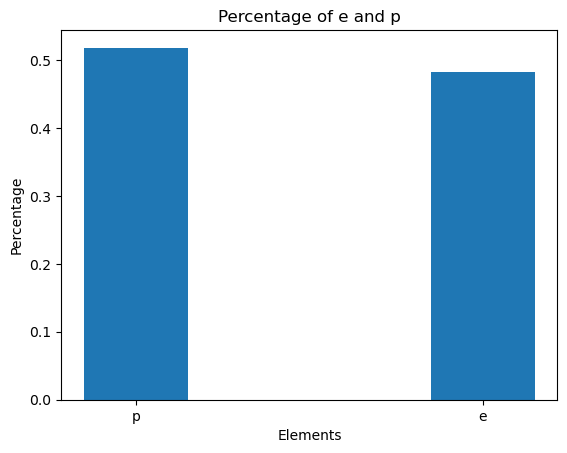

In [8]:
# Check if the dataset is balanced- i.e since we are trying to predict if a mushroom is edible to not, we have to have a data balance for the two categories
class_output_list = mushroom_data['class'].tolist()
e_list = class_output_list.count('e')/len(class_output_list)
p_list = class_output_list.count('p')/len(class_output_list)
plt.bar(list(set(class_output_list)),[e_list,p_list],width= 0.3)
plt.title('Percentage of e and p')
plt.xlabel('Elements')
plt.ylabel('Percentage')
plt.show()

### Data Preprocessing

In [9]:
# Convert all the categorical data to numerical values with Label_Encoder
class_label_mappings = []
encoder = LabelEncoder()
for column in mushroom_data.columns:
    mushroom_data[column] = encoder.fit_transform(mushroom_data[column])
    mappings = {index : label for index,label in enumerate(encoder.classes_)}
    class_label_mappings.append(mappings)
class_label_mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [10]:
# Test and Train split data

# "class" column as numpy array.
y = mushroom_data["class"].values
x = mushroom_data.drop(["class"], axis=1)

# Normalizing the data
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
# Split thr data into train and test set.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [11]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [12]:
# Test knn classifier

best_Kvalue = 0
best_score = 0

for i in range(1,8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        print(knn.score(x_test,y_test))
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i

print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))


1.0
Best KNN Value: 1
Test Accuracy: 100.0%


In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))

1.0
